# <a id='4_В_начало.'></a>Анализ спроса пассажиров на рейсы в города с крупнейшими культурными фестивалями.

# План работ: 

- 1.[Аналитика.](#1_Аналитика.)
- 2.[Проверка гипотезы.](#2_Проверка_гипотезы.)
- 3.[Вывод.](#3_Вывод.)

# Описание данных:  

## query_1.csv:  

- model — модель самолета;
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.  

## query_3.csv:

- city — город;
- average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

## query_last.csv:  

- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

# 1. Аналитика.<a id='1_Аналитика.'></a>

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats as st

Загрузим и посмотрим на данные:

In [2]:
model_flights_amount = pd.read_csv('/datasets/query_1.csv')
city_average_flights = pd.read_csv('/datasets/query_3.csv')
festivals = pd.read_csv('/datasets/query_last.csv')

In [3]:
model_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Тип данных в этой выборке корректный - строки и целые числа.

In [4]:
city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Тип данных в этой выборке корректный - строки и вещественные числа.

In [5]:
model_flights_amount.head(20)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
city_average_flights.head(20)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Внимательнее рассмотрим данные.  

Сначала количество полётов по моделям самолётов: 

In [7]:
model_flights_amount.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


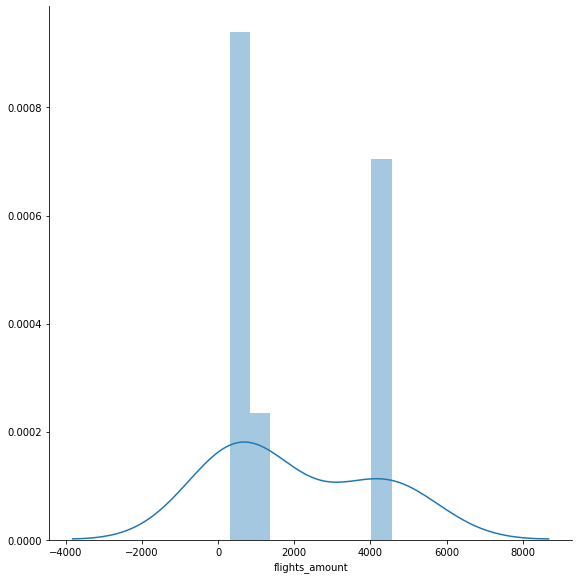

In [8]:
sns.FacetGrid(model_flights_amount['flights_amount'], height=8)
sns.distplot(model_flights_amount['flights_amount'], bins=8)

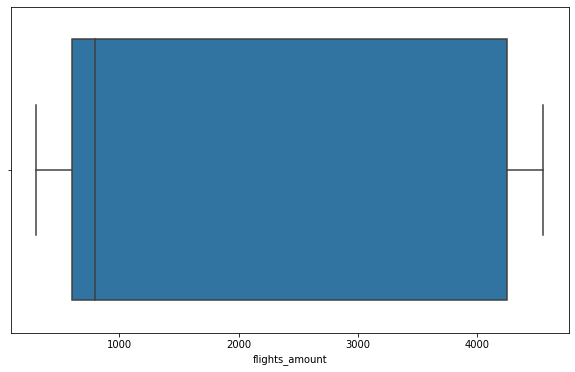

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(model_flights_amount['flights_amount'])
plt.show()

In [10]:
model_flights_amount[model_flights_amount['flights_amount'] > 1000]

,model,flights_amount
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Три модели самолётов имеют сильное отличие от остальных.  

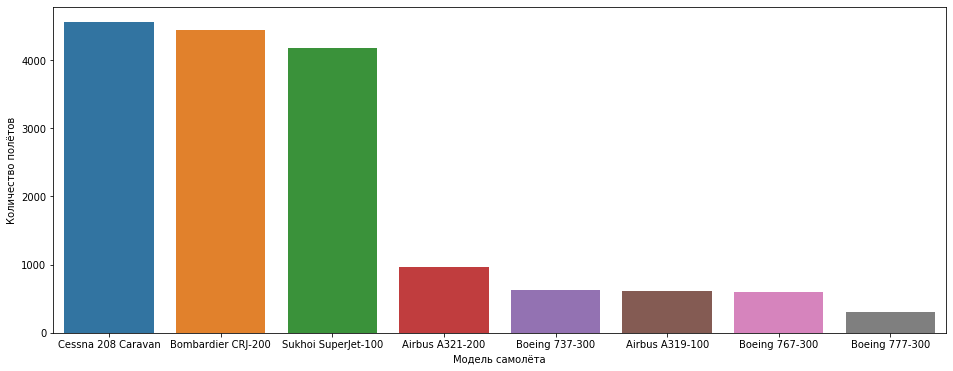

In [11]:
model_flights_amount = model_flights_amount.sort_values(by='flights_amount', ascending=False)
plt.figure(figsize=(16, 6))
sns.barplot(x=model_flights_amount['model'], y=model_flights_amount['flights_amount'])
plt.xlabel('Модель самолёта')
plt.ylabel('Количество полётов')
plt.show()

Теперь посмотрим на среднее количество полётов по гродам:

In [12]:
city_average_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


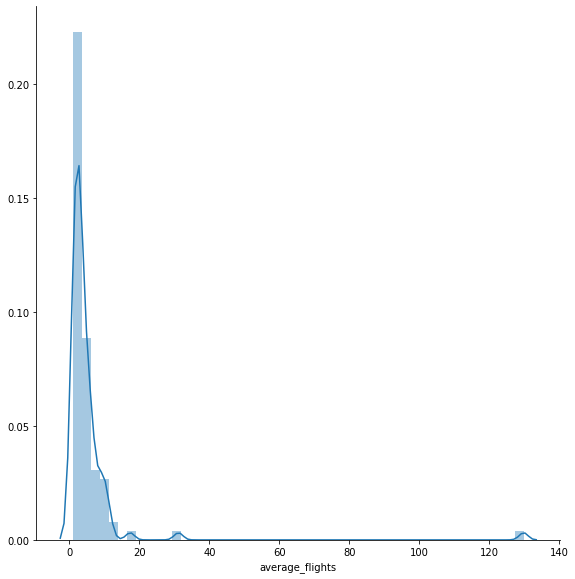

In [13]:
sns.FacetGrid(city_average_flights['average_flights'], height=8)
sns.distplot(city_average_flights['average_flights'], bins=50)

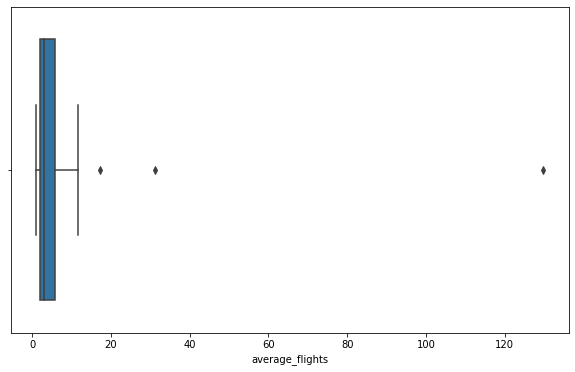

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(city_average_flights['average_flights'])
plt.show()

Видны 3 сильно выбивающиеся точки со средним количеством более 15 полётов.

In [15]:
city_average_flights[city_average_flights['average_flights'] > 15]

,city,average_flights
43,Москва,129.774194
54,Новосибирск,17.322581
70,Санкт-Петербург,31.161290


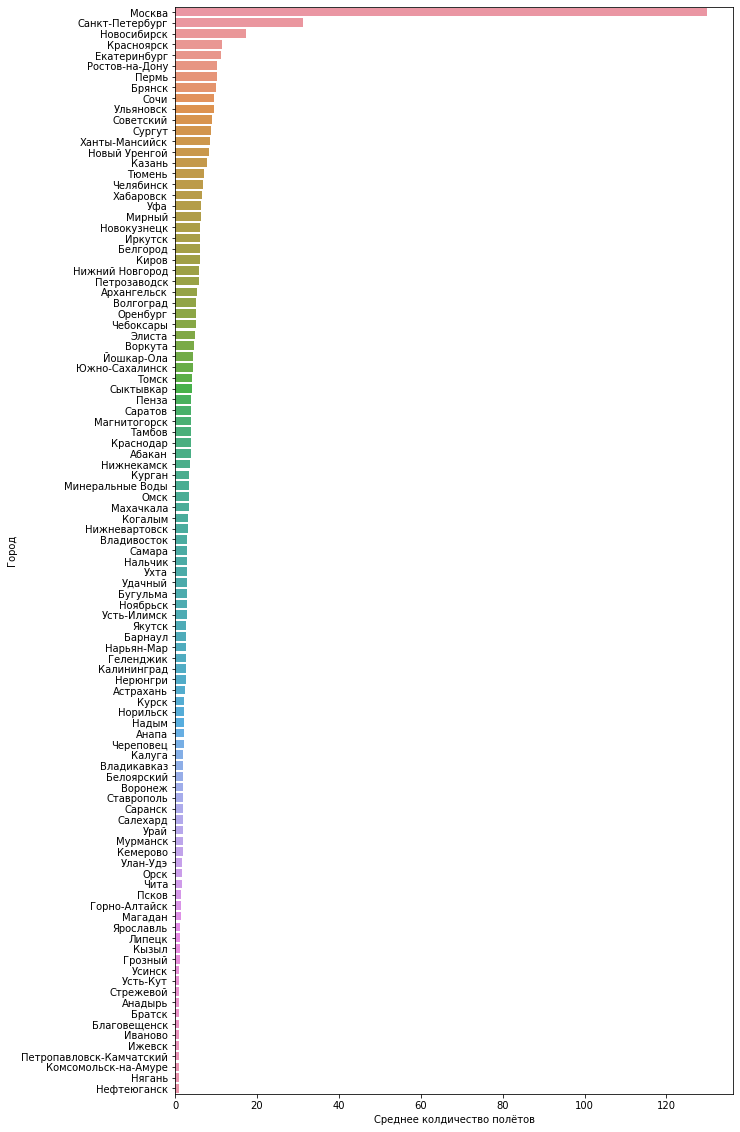

In [17]:
plt.figure(figsize=(10, 20))
sns.barplot(x=city_average_flights['average_flights'], y=city_average_flights['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.show()

Три крупнейши города, выбиваются из общего числа полётов. Ничего удивительного.  
Установим ограничение по игрику для лучшего рассмотрения графика полётов:

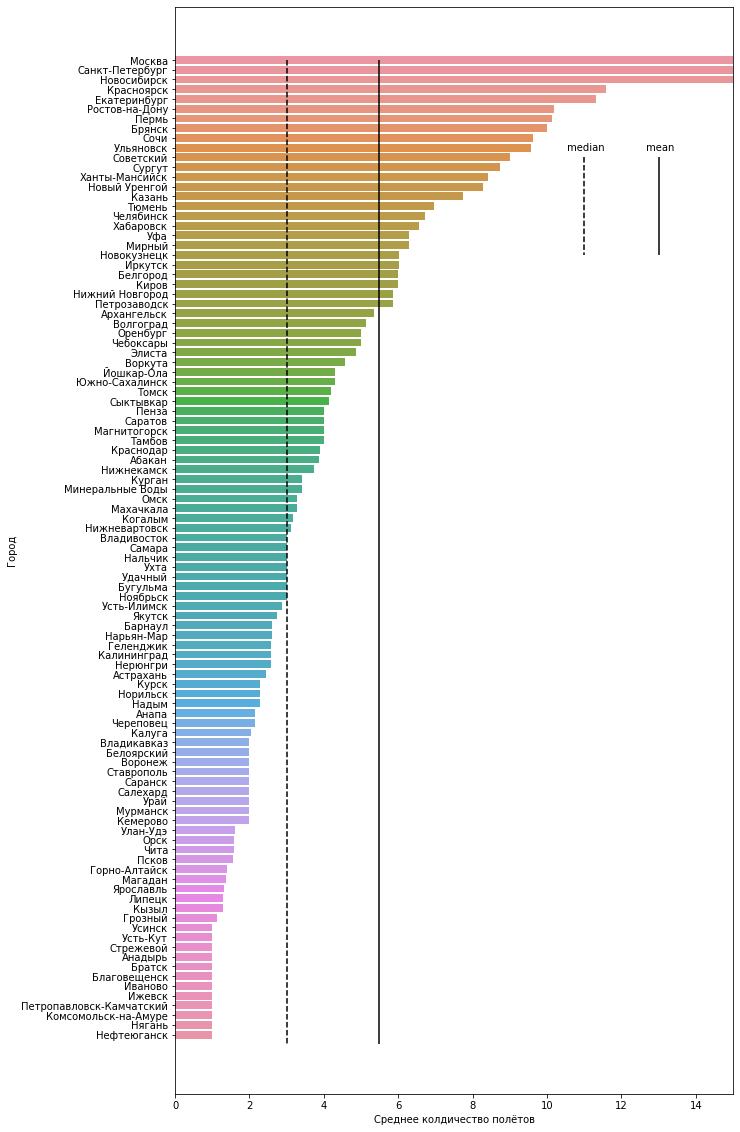

In [19]:
plt.figure(figsize=(10, 20))
sns.barplot(x=city_average_flights['average_flights'], y=city_average_flights['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.vlines(city_average_flights['average_flights'].mean(), 0, len(city_average_flights['city']))
plt.vlines(x=13, ymin=10, ymax=20)
plt.text(13, 9, ' mean', ha='center', va='center')
plt.vlines(city_average_flights['average_flights'].median(), 0, len(city_average_flights['city']), linestyles='dashed', label='median')
plt.vlines(x=11, ymin=10, ymax=20, linestyles='dashed')
plt.text(11, 9, ' median', ha='center', va='center')
plt.xlim([0, 15])
plt.show()

Видим, что среднее количество всех полётов больше медианного количества всех полётов.  

Построим график топ 10 городов по количеству рейсов:

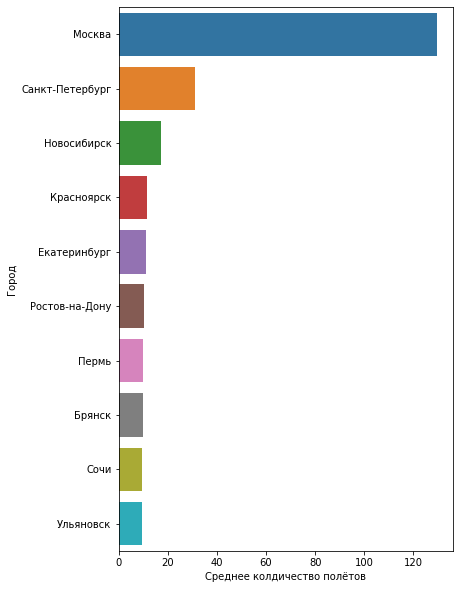

In [21]:
top_10_city = city_average_flights.head(10)
plt.figure(figsize=(6, 10))
sns.barplot(x=top_10_city['average_flights'], y=top_10_city['city'], )
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.show()

Аналогично общему графику городов, обрежим максимальное количество до 15 для наглядности.

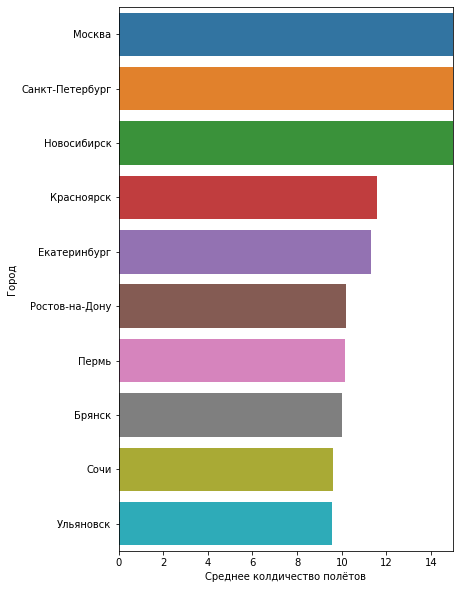

In [23]:
top_10_city = city_average_flights.head(10)
plt.figure(figsize=(6, 10))
sns.barplot(x=top_10_city['average_flights'], y=top_10_city['city'])
plt.xlabel('Среднее колдичество полётов')
plt.ylabel('Город')
plt.xlim(0, 15)
plt.show()

Из выборки по моделям самолётов явно выбиваются Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100.  

Самые большие города - Москва, Санкт-Петербург и Новосибирск, выделяются по количеству полётов из списка полётов.

# 2. Проверка гипотезы.<a id='2_Проверка_гипотезы.'></a>

Посмотрим на выборку по фестивалям:

In [24]:
festivals

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [25]:
festivals['ticket_amount'].describe()

count       10.000000
mean     50670.400000
std       2502.752716
min      43568.000000
25%      51364.500000
50%      51439.000000
75%      51596.750000
max      51675.000000
Name: ticket_amount, dtype: float64

In [26]:
festivals[festivals['festival_name'] != 'unknown']['ticket_amount'].describe()

count       10.000000
mean     50670.400000
std       2502.752716
min      43568.000000
25%      51364.500000
50%      51439.000000
75%      51596.750000
max      51675.000000
Name: ticket_amount, dtype: float64

In [27]:
festivals[festivals['festival_name'] == 'unknown']['ticket_amount'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ticket_amount, dtype: float64

Заполним пропуски в названии фестиваля словом unknown:

In [28]:
festivals['festival_name'].fillna('unknown', inplace=True)

Посмотрим на распределение ticket_amount:

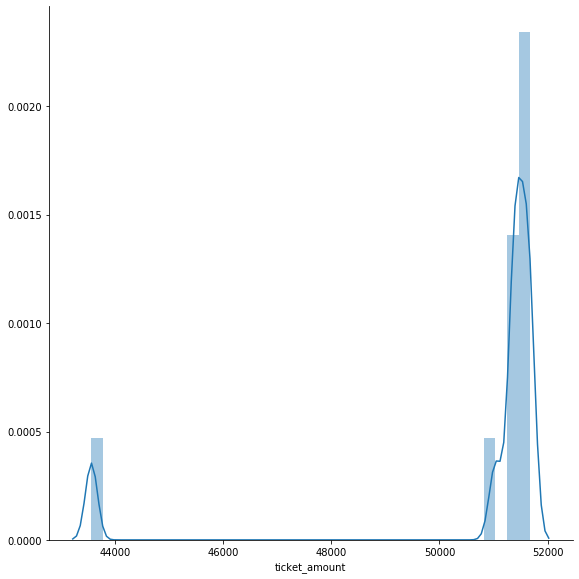

In [29]:
sns.FacetGrid(festivals['ticket_amount'], height=8)
sns.distplot(festivals['ticket_amount'])

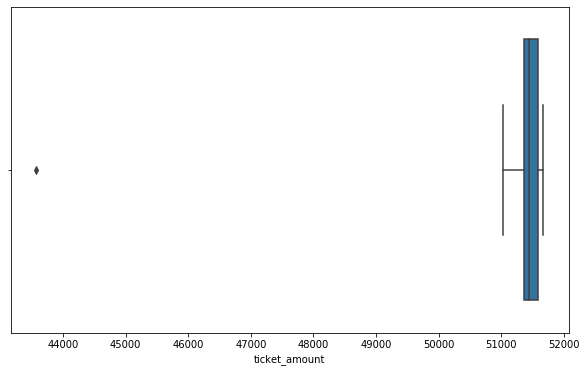

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(festivals['ticket_amount'])
plt.show()

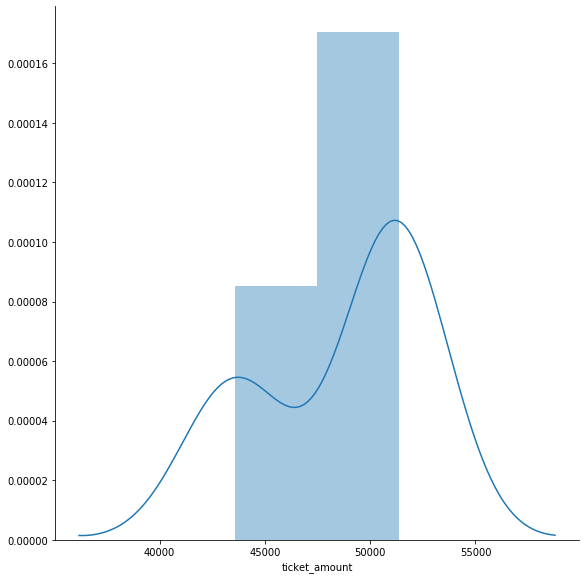

In [31]:
sns.FacetGrid(festivals[festivals['festival_name'] != 'unknown']['ticket_amount'], height=8)
sns.distplot(festivals[festivals['festival_name'] != 'unknown']['ticket_amount'])

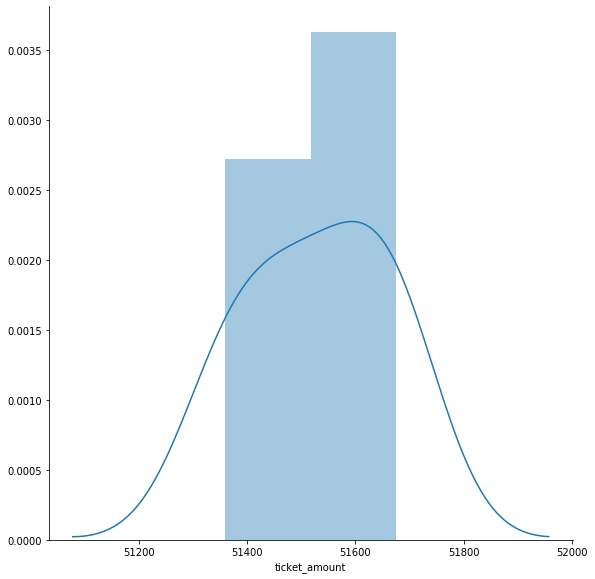

In [32]:
sns.FacetGrid(festivals[festivals['festival_name'] == 'unknown']['ticket_amount'], height=8)
sns.distplot(festivals[festivals['festival_name'] == 'unknown']['ticket_amount'])

Количество данных очень маленькое. Распределение не получится назвать нормальным, поэтому для проверки гипотиз функцию ttest_ind использовать не желательно, возьмём функцию mannwhitneyu.

Нулевая гипотиза состоит в том, что средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время. Соответственно альтернативная - что не отличается. Пороговое значение alpha возьмём 0.05, т.к. это не медецинское исследование и слишком маленький поог не нужен.

Нулевая гипотиза состоит в том, что средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время. Соответственно альтернативная - что спросы отличаются. Пороговое значение alpha возьмём 0.05, т.к. это не медецинское исследование и слишком маленький поог не нужен.

In [38]:
alpha = .05
#results = st.ttest_ind(
results = st.mannwhitneyu(
    festivals.query('festival_name != "unknown"')['ticket_amount'],
    festivals.query('festival_name == "unknown"')['ticket_amount'],
    #use_continuity=False
)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


P-value меньше 0.05, значит с очень маленькой вероятностью(3.4%) такое различие можно получить случайно. Спрос на билеты скорее различен, чем нет.

# 3. Вывод.<a id='3_Вывод.'></a>  

Данные корректны. Исходя из исследования данных, можно сказать, что три модели самолётов(Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100) имеют сильное отличие по количеству полётов, а остальные распределены более равномерно.  
Самые большие города - Москва, Санкт-Петербург и Новосибирск, выделяются по количеству полётов из списка полётов. У остальных городов идёт плавное снижение количества полётов, скорее всего в зависимости от размеров. Различая не такие критичные.

Культурные фестивали скорее влияют на покупку билетов в города их проведения, чем нет. 

[В начало.](#4_В_начало.)